In [3]:
from sim.plot import plot_simple
import random as r

In [4]:
class Robot:
    def __init__(self, pos):
        self.pos = pos
        self.pole_detected = False
        self.move_dist = 1

    def move(self):
        self.pos += self.move_dist

    def detect_pole(self, poles):
        if self.pos + 1 in poles:
            self.pole_detected = True
        else:
            self.pole_detected = False


class Particle(Robot):
    def __init__(self, pos, color):
        # If you don't understand this, see derived_classes.py in my Python
        # Intro Course mentioned in the 2nd lecture.
        Robot.__init__(self, pos)
        self.belief = 1
        self.color = color

    def predict(self):
        # START STUDENT CODE
        # Move the particle the same distance as the robot moves.
        self.pos += self.move_dist
        # END STUDENT CODE

    def update_belief(self, robot_pole_detected):
        # START STUDENT CODE
        # Set the belief to 0 if the robot detection and the particle detection
        # don't match.
        if self.pole_detected != robot_pole_detected:
            self.belief = 0
        # END STUDENT CODE



Starting Number of Particles: 40


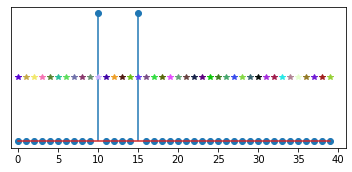

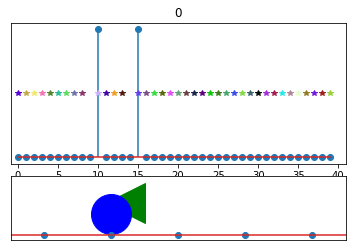

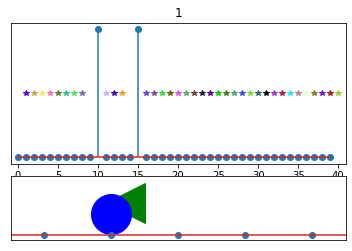

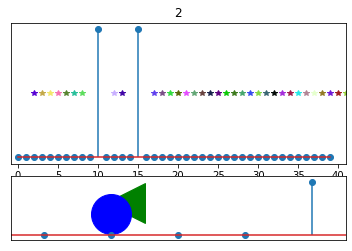

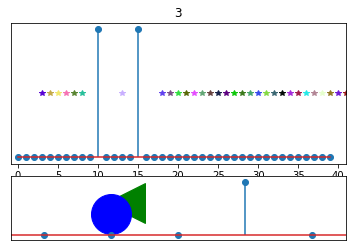

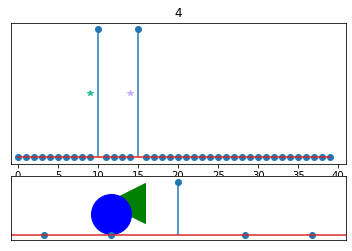

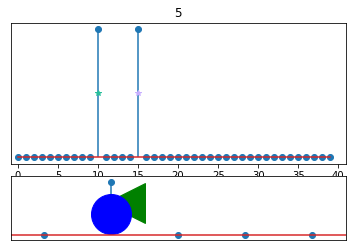

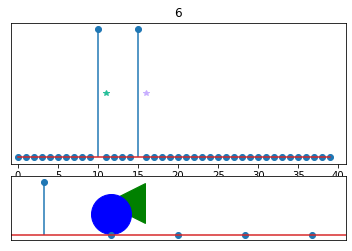

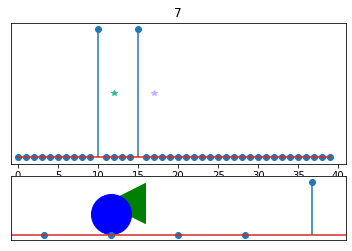

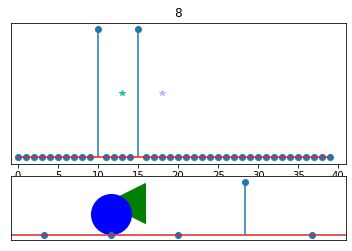

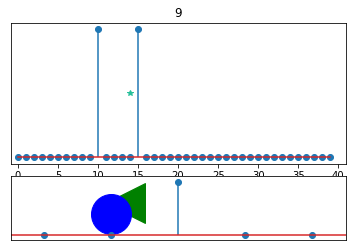

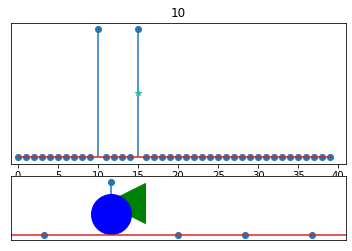

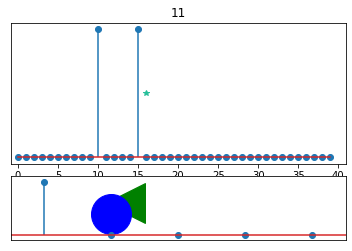

In [5]:
# Setup Robot Location
robot = Robot(5)
poles = [10, 15]

# Setup particles.
num_of_locations = 40
particle_spacing = 1
print("Starting Number of Particles: " +
      str(int(num_of_locations / particle_spacing)))
particles = []
for i in range(0, num_of_locations, particle_spacing):
    color = (r.random(), r.random(), r.random(), 1)
    particles += [Particle(i, color)]

# Plot starting distribution, no beliefs
plot_simple(particles, poles)

# Begin Calculating
for j in range(12):
    # Move
    if j != 0:
        robot.move()
        for particle in particles:
            particle.predict()

    # Measure
    robot.detect_pole(poles)
    for particle in particles:
        particle.detect_pole(poles)

        # Update Beliefs
        particle.update_belief(robot.pole_detected)

    plot_simple(particles, poles, robot.pos, j)
